In [5]:
import pandas as pd
# sph related imports
# from sph import *
# from perlin import *
# neural network rlated imports
# from torch.optim import Adam
# from rbfConv import *
# from torch_geometric.loader import DataLoader
# from trainingHelper import *
# plotting/UI related imports
# from plotting import *
import matplotlib as mpl
# plt.style.use('dark_background')
cmap = mpl.colormaps['viridis']
from tqdm.notebook import trange, tqdm
from IPython.display import display, Latex
from datetime import datetime
# from rbfNet import *
from tqdm.notebook import tqdm
# import h5py
import matplotlib.colors as colors
# %matplotlib notebook
import os
import numpy as np

import matplotlib.pyplot as plt

plt.ion()

AttributeError: module 'numpy.random' has no attribute 'BitGenerator'

In [123]:
ablationFiles = [f for f in os.listdir('.') if f.endswith('.csv') and 'density' in f and 'Gradient' not in f]
ablationFiles = [f for f in os.listdir('.') if f.endswith('.csv') and 'density' in f and 'Gradient' in f]
ablationFiles = [f for f in os.listdir('.') if f.endswith('.csv') and 'density' not in f]
print(ablationFiles)

['ablationStudy_linear ns [4] ws [32 16 8 4 2 1] ds [6 5 4 3 2 1] seeds [843595861 333047626 31069755 249963499].csv', 'ablationStudy_linear_poly6 ns [4] ws [32 16 8 4 2 1] ds [6 5 4 3 2 1] seeds [843595861 333047626 31069755 249963499].csv', 'ablationStudy_fourier ns [4] ws [32 16 8 4 2 1] ds [6 5 4 3 2 1] seeds [843595861 333047626 31069755 249963499].csv', 'ablationStudy_fourier ns [1 2 4 8 16] ws [1 2 4 8 16 32] ds [1 2 3 4 5 6] seeds [843595861 333047626 31069755 249963499].csv']


In [124]:
# display(pd.read_csv(ablationFiles[0]))

In [125]:
dataset = pd.DataFrame()

In [126]:
for f in ablationFiles:
    datafile = pd.read_csv(f)
#     display(data)
    dataset = pd.concat([dataset, datafile], ignore_index = True)

In [127]:
display(dataset)

,Unnamed: 0,label,seed,window,file,basis,n,entry,params,depth,width,r2,l2,psnr,min,max,q1,q3,std
0,0,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",843595861,NaN,perlin_433611252,linear,4,0,31586,7,32,0.998715,0.001033,35.195298,3.842615e-11,0.030938,0.000066,0.001187,0.002001
1,1,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",843595861,NaN,perlin_433611252,linear,4,1,31586,7,32,0.999885,0.001081,42.341093,6.878054e-12,0.024920,0.000112,0.001085,0.002195
2,2,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",843595861,NaN,perlin_433611252,linear,4,2,31586,7,32,0.999670,0.000951,40.817261,2.046363e-10,0.011753,0.000098,0.001101,0.001392
3,3,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",843595861,NaN,perlin_433611252,linear,4,3,31586,7,32,0.999720,0.001357,40.027436,6.571099e-11,0.028905,0.000064,0.001372,0.002755
4,4,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",843595861,NaN,perlin_960745502,linear,4,0,31586,7,32,0.998672,0.001013,33.327624,1.782610e-10,0.050276,0.000061,0.000926,0.002694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,11,"fourier x 2 @ [1, 1]",843595861,NaN,perlin_759352143,fourier,2,3,16,2,1,0.946629,0.066403,17.836720,6.903088e-08,0.223016,0.006447,0.117357,0.068839
6940,12,"fourier x 2 @ [1, 1]",843595861,NaN,perlin_37078787,fourier,2,0,16,2,1,0.655103,0.190659,13.798902,6.024665e-08,1.361631,0.010924,0.204441,0.312613
6941,13,"fourier x 2 @ [1, 1]",843595861,NaN,perlin_37078787,fourier,2,1,16,2,1,0.932909,0.123451,17.002254,1.248466e-07,0.947690,0.013174,0.156193,0.157984
6942,14,"fourier x 2 @ [1, 1]",843595861,NaN,perlin_37078787,fourier,2,2,16,2,1,0.961455,0.064478,21.475174,1.145969e-08,1.021315,0.001054,0.038885,0.180694


In [128]:
dataset = dataset[dataset.n == 4]
display(dataset.groupby(['basis', 'depth','width','n']).mean(numeric_only = True))


Unnamed: 0          seed  entry   params        r2  \
basis   depth width n                                                       
fourier 2     1     4         7.5  3.644192e+08    1.5     24.0  0.901558   
              2     4         7.5  3.644192e+08    1.5     46.0  0.955347   
              4     4         7.5  3.644192e+08    1.5     90.0  0.966468   
              8     4         7.5  3.644192e+08    1.5    178.0  0.993401   
              16    4         7.5  3.644192e+08    1.5    354.0  0.993974   
...                           ...           ...    ...      ...       ...   
linear  7     2     4         7.5  3.644192e+08    1.5    176.0  0.325505   
              4     4         7.5  3.644192e+08    1.5    590.0  0.891168   
              8     4         7.5  3.644192e+08    1.5   2138.0  0.913295   
              16    4         7.5  3.644192e+08    1.5   8114.0  0.933500   
              32    4         7.5  3.644192e+08    1.5  31586.0  0.950764   

                             l2       psnr           min       max        q1  \
basis   depth width n                                                          
fourier 2     1     4  0.102887  19.017850  8.635955e-08  0.695769  0.015114   
              2     4  0.045351  23.429551  6.954167e-08  0.382020  0.005028   
              4     4  0.034176  26.306244  2.675606e-08  0.244871  0.003804   
              8     4  0.006785  30.473095  1.583055e-08  0.075580  0.000516   
              16    4  0.006103  30.860726  2.658546e-09  0.060724  0.000409   
...                         ...        ...           ...       ...       ...   
linear  7     2     4  1.439914  10.190126  1.590478e-06  4.835578  0.325797   
              4     4  0.112439  19.252035  1.080342e-07  0.708460  0.016731   
              8     4  0.087959  20.958972  1.047091e-07  0.683163  0.012852   
              16    4  0.067817  26.306225  7.948120e-08  0.420534  0.010682   
              32    4  0.050293  30.166471  5.305935e-08  0.313252  0.007795   

                             q3       std  
basis   depth width n                      
fourier 2     1     4  0.134369  0.140859  
              2     4  0.053805  0.069389  
              4     4  0.042994  0.049516  
              8     4  0.007789  0.011348  
              16    4  0.006840  0.010214  
...                         ...       ...  
linear  7     2     4  2.208223  1.372455  
              4     4  0.149040  0.147640  
              8     4  0.115126  0.120183  
              16    4  0.090947  0.088358  
              32    4  0.067160  0.066052  

[72 rows x 12 columns]

In [129]:

# fig, axis = plt.subplots(4,1, figsize=(8,12), sharex = True, sharey = False, squeeze = False)

# dataset[dataset['basis'] == 'linear'].boxplot(column = ['l2', 'psnr', 'r2', 'max'], by = ['basis', 'n','params','width','depth'], 
#                 ax = axis, layout=(4,1),figsize=(18,12))
# # dataset.boxplot(column = ['l2', 'psnr', 'r2', 'max'], by = ['params'], ax = axis, layout=(4,1),figsize=(18,12))
# # axis[0,0].set_xticks(axis[1,0].get_xticks(), axis[1,0].get_xticklabels(), rotation=45, ha='right')
# axis[3,0].set_xticks(axis[3,0].get_xticks(), axis[3,0].get_xticklabels(), rotation=45, ha='right')
# axis[0,0].set_yscale('log')
# # axis[1,0].set_yscale('log')
# axis[3,0].set_yscale('log')
# fig.suptitle('Test for number of base functions')
# fig.tight_layout()

In [130]:
import seaborn as sns

In [131]:
dataset.keys()

Index(['Unnamed: 0', 'label', 'seed', 'window', 'file', 'basis', 'n', 'entry',
       'params', 'depth', 'width', 'r2', 'l2', 'psnr', 'min', 'max', 'q1',
       'q3', 'std'],
      dtype='object')

In [132]:
def getBasisLabel(b):
    if b == 'fourier even':
        return 'Fourier (even)'
    if b == 'fourier odd':
        return 'Fourier (odd)'
    if b == 'fourier':
        return 'Fourier'
    if b == 'ffourier':
        return 'Fourier'
    if b == 'linear':
        return 'CConv'
    if b == 'abf cubic_spline':
        return 'SplineConv'
    if b == 'dmcf':
        return 'DMCF'
    if b == 'rbf square':
        return 'Nearest Neighbor'
    if b == 'chebyshev':
        return 'Chebyshev'
    print('unknown basis function', b)
def getWindowLabel(w):
#     print(w)
    if w == 'poly6':
        return 'Spiky'
    if np.isnan(w):
        return 'None'
    print('unknown window function', w)

In [133]:
basisFunctions = [getBasisLabel(b) for b in dataset['basis'].unique()]
ns = dataset['n'].unique()
windows = [getWindowLabel(w) for w in dataset['window'].unique()]

print(basisFunctions)
print(ns)
print(windows)

['CConv', 'Fourier']
[4]
['None', 'Spiky']


In [134]:
processedData = pd.DataFrame()

for e in tqdm(dataset.index):
#     print(e)
    wind = getWindowLabel(dataset['window'][e])
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'PSNR',
            'value': dataset['psnr'][e]
        },index=[0])], ignore_index=True)
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'L2',
            'value': dataset['l2'][e]
        },index=[0])], ignore_index=True)
    if (dataset['basis'][e]) != 'dmcf':
        processedData = pd.concat([processedData, pd.DataFrame({
                'label': dataset['label'][e],
                'basis': getBasisLabel(dataset['basis'][e]),
                'n': dataset['n'][e],
                'seed': dataset['seed'][e],
                'window': dataset['window'][e],
                'metric': 'R2',
                'value': dataset['r2'][e]
            },index=[0])], ignore_index=True)
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'max L2',
            'value': dataset['max'][e]
        },index=[0])], ignore_index=True)
#     break
display(processedData)

  0%|          | 0/6912 [00:00<?, ?it/s]

,label,basis,n,seed,window,metric,value
0,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,PSNR,35.195298
1,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,L2,0.001033
2,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,R2,0.998715
3,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,max L2,0.030938
4,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,PSNR,42.341093
...,...,...,...,...,...,...,...
27643,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,max L2,0.850077
27644,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,PSNR,20.166973
27645,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,L2,0.071072
27646,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,R2,0.960213


Text(0.5, 0.98, 'Density Gradient Interpolation - Basis Terms Ablation Study')

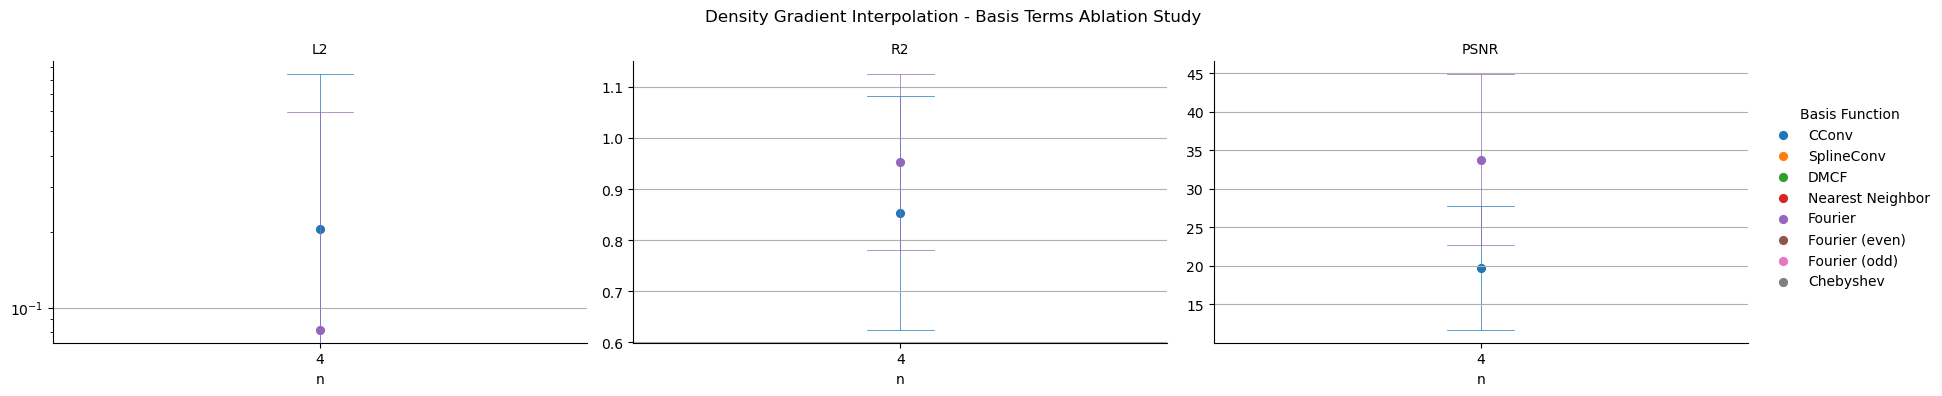

In [135]:
g = sns.catplot(x = 'n', y = 'value', hue = 'basis', col = 'metric', data = processedData, 
                kind = 'point', errorbar = 'sd', height = 4, sharey = False, 
                hue_order = ['CConv','SplineConv','DMCF', 'Nearest Neighbor', 'Fourier', 'Fourier (even)', 'Fourier (odd)', 'Chebyshev'],
                col_order = ['L2', 'R2', 'PSNR'], aspect = 1.5, errwidth=0.5, capsize=0.125, scale = 0.75)
g.set_axis_labels('n','')
g.set_titles('{col_name}')
# g.axes[0,0].set_title('L2')
g.axes[0,0].set_yscale('log')
# g.axes[0,1].set_title('R2')
# g.axes[0,2].set_title('PSNR')
g.axes[0,0].grid(which = 'major', axis = 'y')
g.axes[0,1].grid(which = 'major', axis = 'y')
g.axes[0,2].grid(which = 'major', axis = 'y')
g._legend.set_title('Basis Function')
g.despine(left=False)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Density Gradient Interpolation - Basis Terms Ablation Study')

In [136]:
processedData = pd.DataFrame()

for e in tqdm(dataset.index):
#     print(e)
    wind = getWindowLabel(dataset['window'][e])
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]) if wind == 'None' else getBasisLabel(dataset['basis'][e]) + ' ' + getWindowLabel(dataset['window'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'PSNR',
            'value': dataset['psnr'][e],
            'Parameters': dataset['params'][e],
            'Width': dataset['width'][e],
            'Depth': dataset['depth'][e]
        },index=[0])], ignore_index=True)
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]) if wind == 'None' else getBasisLabel(dataset['basis'][e]) + ' ' + getWindowLabel(dataset['window'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'L2',
            'value': dataset['l2'][e],
            'Parameters': dataset['params'][e],
            'Width': dataset['width'][e],
            'Depth': dataset['depth'][e]
        },index=[0])], ignore_index=True)
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]) if wind == 'None' else getBasisLabel(dataset['basis'][e]) + ' ' + getWindowLabel(dataset['window'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'R2',
            'value': dataset['r2'][e],
            'Parameters': dataset['params'][e],
            'Width': dataset['width'][e],
            'Depth': dataset['depth'][e]
        },index=[0])], ignore_index=True)
    processedData = pd.concat([processedData, pd.DataFrame({
            'label': dataset['label'][e],
            'basis': getBasisLabel(dataset['basis'][e]) if wind == 'None' else getBasisLabel(dataset['basis'][e]) + ' ' + getWindowLabel(dataset['window'][e]),
            'n': dataset['n'][e],
            'seed': dataset['seed'][e],
            'window': dataset['window'][e],
            'metric': 'max L2',
            'value': dataset['max'][e],
            'Parameters': dataset['params'][e],
            'Width': dataset['width'][e],
            'Depth': dataset['depth'][e]
        },index=[0])], ignore_index=True)
#     break
display(processedData)

  0%|          | 0/6912 [00:00<?, ?it/s]

,label,basis,n,seed,window,metric,value,Parameters,Width,Depth
0,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,PSNR,35.195298,31586,32,7
1,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,L2,0.001033,31586,32,7
2,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,R2,0.998715,31586,32,7
3,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,max L2,0.030938,31586,32,7
4,"linear x 4 @ [32, 32, 32, 32, 32, 32, 1]",CConv,4,843595861,NaN,PSNR,42.341093,31586,32,7
...,...,...,...,...,...,...,...,...,...,...
27643,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,max L2,0.850077,24,1,2
27644,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,PSNR,20.166973,24,1,2
27645,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,L2,0.071072,24,1,2
27646,"fourier x 4 @ [1, 1]",Fourier,4,249963499,NaN,R2,0.960213,24,1,2


In [139]:
processedData['Parameters'] = processedData['Parameters'].astype(float)

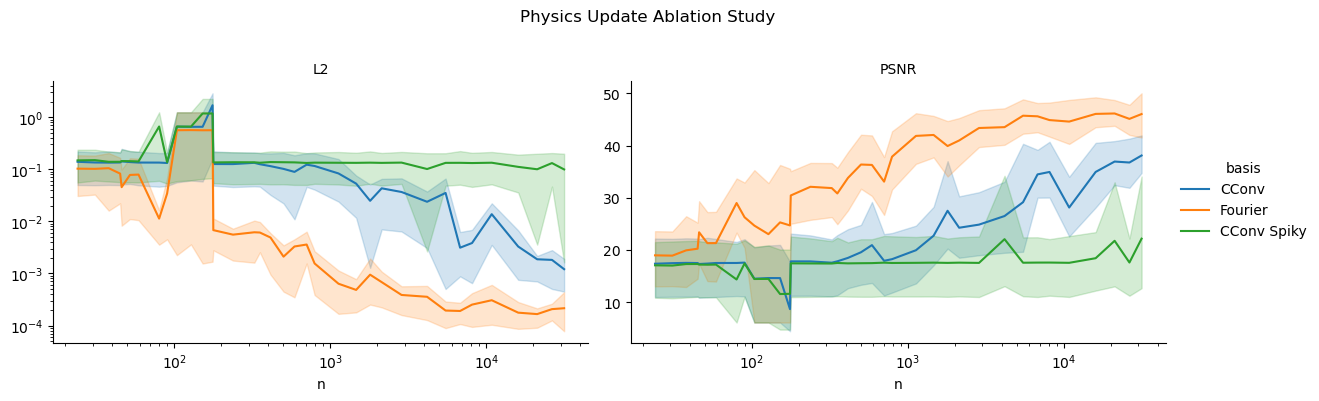

In [140]:
g = sns.relplot(x = 'Parameters', y = 'value', hue = 'basis', col = 'metric', data = processedData, 
                kind = 'line', errorbar = ('pi',70), height = 4, 
#                 hue_order = ['CConv','SplineConv','DMCF', 'Fourier', 'Fourier (even)', 'Chebyshev'],
                hue_order = ['CConv','Fourier','CConv Spiky'], facet_kws = {'sharey':False},
                col_order = ['L2', 'PSNR'], aspect = 1.5)
g.set_axis_labels('n','')
# g.axes[0,0].set_title('PSNR')
# g.axes[0,1].set_title('R2')
g.axes[0,0].set_yscale('log')
g.set_titles('{col_name}')
g.despine(left=False)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Physics Update Ablation Study')
g.axes[0,0].set_xscale('log')
# g.axes[0,0].set_xlim(2, 2**16)

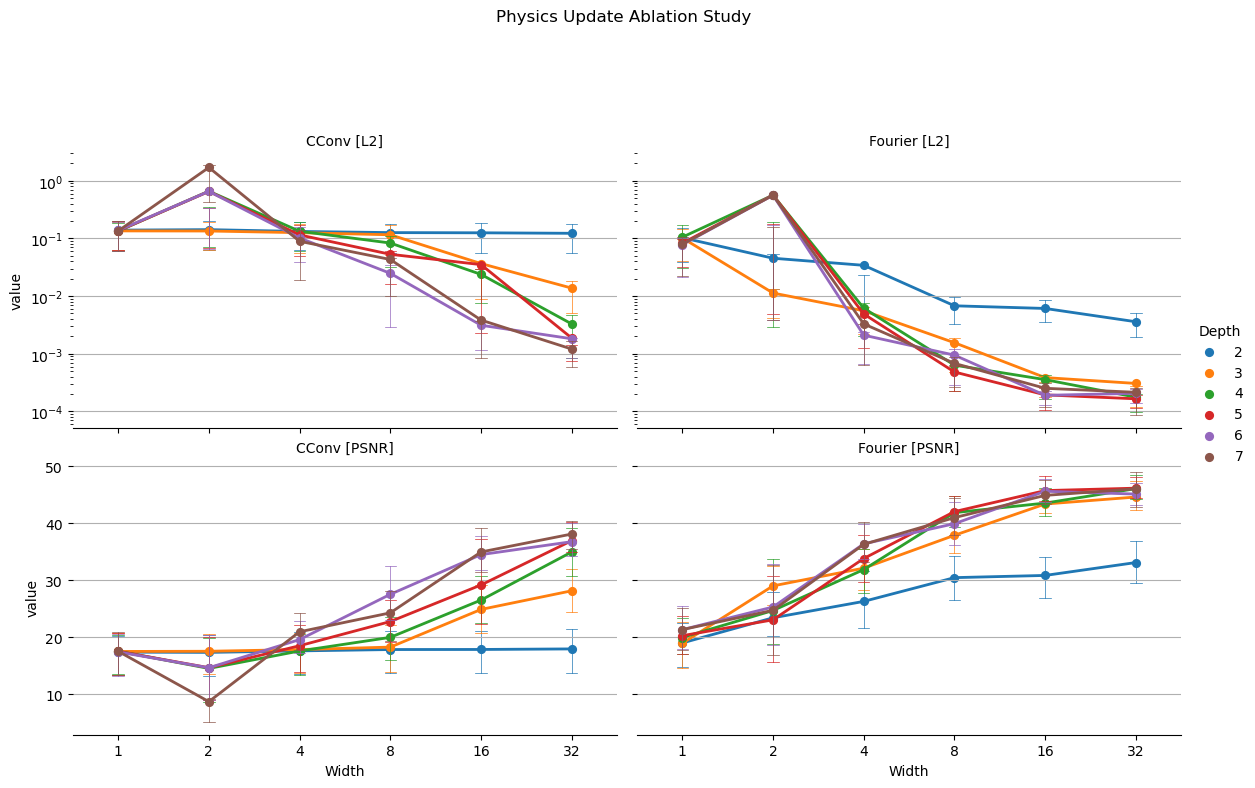

In [141]:

# fig, axis = plt.subplots(4,1, figsize=(8,12), sharex = True, sharey = False, squeeze = False)

g = sns.catplot(x = 'Width', y = 'value', hue = 'Depth', col ='basis', row = 'metric', data = processedData, 
                kind = 'point', height = 4, 
#                 hue_order = ['CConv','SplineConv','DMCF', 'Fourier', 'Fourier (even)', 'Chebyshev'],
                col_order = ['CConv','Fourier'], sharey= 'row',
                row_order = ['L2', 'PSNR'], 
                aspect = 1.5, errorbar = ('pi', 50), scale = 0.75, errwidth=0.5, capsize=0.125,)

g.set_titles('{col_name} [{row_name}]')
g.despine(left=True)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Physics Update Ablation Study')

# for xax in g.axes:
#     for ax in xax:
#         ax.set_yscale('log')
#         ax.grid(which = 'major', axis = 'y')


# for xax in g.axes:
for ax in g.axes[0,:]:
    ax.set_yscale('log')
    ax.grid(which = 'major', axis = 'y')
for ax in g.axes[1,:]:
#     ax.set_yscale('log')
    ax.grid(which = 'major', axis = 'y')


In [19]:
# !pip install -U seaborn